In [1]:
import simfin as sf
import pandas as pd
import matplotlib.pyplot as plt

from simfin.names import *

In [2]:
sf.set_api_key('free')
sf.set_data_dir('D://Notebooks/data/simfin_data/')

In [3]:
df_income = sf.load_income(variant='quarterly', market='us').reset_index()
df_income.columns

Dataset "us-income-quarterly" on disk (0 days old).
- Loading from disk ... Done!


Index(['Ticker', 'Report Date', 'SimFinId', 'Currency', 'Fiscal Year',
       'Fiscal Period', 'Publish Date', 'Restated Date', 'Shares (Basic)',
       'Shares (Diluted)', 'Revenue', 'Cost of Revenue', 'Gross Profit',
       'Operating Expenses', 'Selling, General & Administrative',
       'Research & Development', 'Depreciation & Amortization',
       'Operating Income (Loss)', 'Non-Operating Income (Loss)',
       'Interest Expense, Net', 'Pretax Income (Loss), Adj.',
       'Abnormal Gains (Losses)', 'Pretax Income (Loss)',
       'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses)', 'Net Income',
       'Net Income (Common)'],
      dtype='object')

In [4]:
df_cash = sf.load_cashflow(variant='quarterly', market='us').reset_index()
df_cash.columns

Dataset "us-cashflow-quarterly" on disk (0 days old).
- Loading from disk ... Done!


Index(['Ticker', 'Report Date', 'SimFinId', 'Currency', 'Fiscal Year',
       'Fiscal Period', 'Publish Date', 'Restated Date', 'Shares (Basic)',
       'Shares (Diluted)', 'Net Income/Starting Line',
       'Depreciation & Amortization', 'Non-Cash Items',
       'Change in Working Capital', 'Change in Accounts Receivable',
       'Change in Inventories', 'Change in Accounts Payable',
       'Change in Other', 'Net Cash from Operating Activities',
       'Change in Fixed Assets & Intangibles',
       'Net Change in Long Term Investment',
       'Net Cash from Acquisitions & Divestitures',
       'Net Cash from Investing Activities', 'Dividends Paid',
       'Cash from (Repayment of) Debt', 'Cash from (Repurchase of) Equity',
       'Net Cash from Financing Activities', 'Net Change in Cash'],
      dtype='object')

In [5]:
df_balance = sf.load_balance(variant='quarterly', market='us').reset_index()
df_balance.columns

Dataset "us-balance-quarterly" on disk (28 days old).
- Loading from disk ... Done!


Index(['Ticker', 'Report Date', 'SimFinId', 'Currency', 'Fiscal Year',
       'Fiscal Period', 'Publish Date', 'Restated Date', 'Shares (Basic)',
       'Shares (Diluted)', 'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Inventories', 'Total Current Assets',
       'Property, Plant & Equipment, Net',
       'Long Term Investments & Receivables', 'Other Long Term Assets',
       'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals',
       'Short Term Debt', 'Total Current Liabilities', 'Long Term Debt',
       'Total Noncurrent Liabilities', 'Total Liabilities',
       'Share Capital & Additional Paid-In Capital', 'Treasury Stock',
       'Retained Earnings', 'Total Equity', 'Total Liabilities & Equity'],
      dtype='object')

In [6]:
df_prices = sf.load_shareprices(variant='daily', market='us').reset_index()
df_prices['Market Cap'] = df_prices['Close'] * df_prices['Shares Outstanding']
df_prices.columns

Dataset "us-shareprices-daily" on disk (0 days old).
- Loading from disk ... Done!


Index(['Ticker', 'Date', 'SimFinId', 'Open', 'Low', 'High', 'Close',
       'Adj. Close', 'Dividend', 'Volume', 'Shares Outstanding', 'Market Cap'],
      dtype='object')

In [7]:
tickers = ['AAPL', 'AMZN', 'XOM']
num_quarters = 4*10
num_days = 365*10
fig_size_1 = (12, 4)

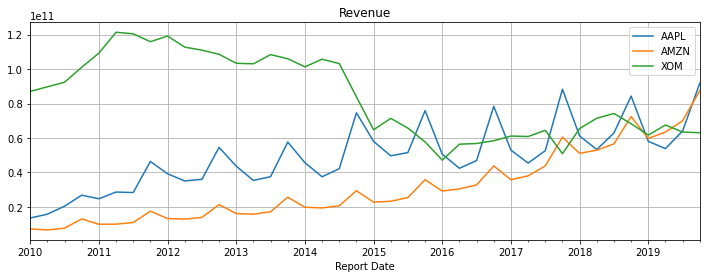

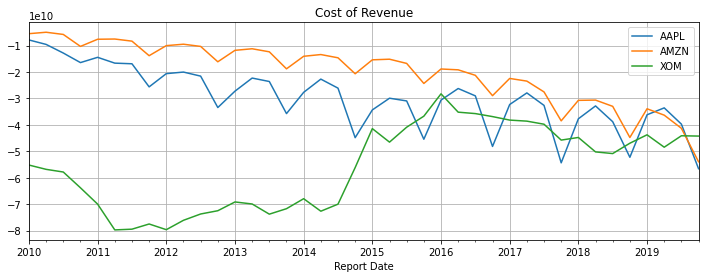

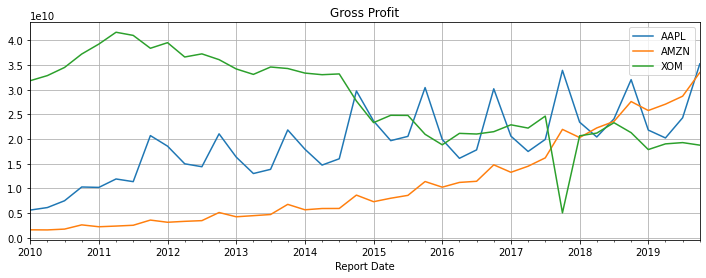

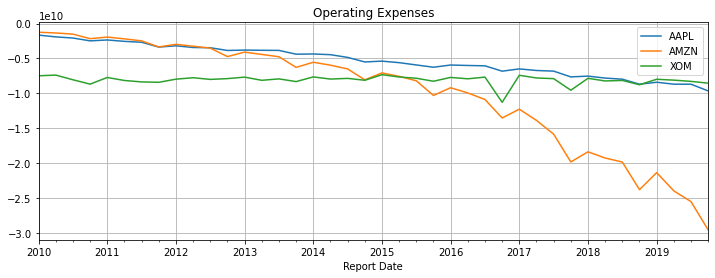

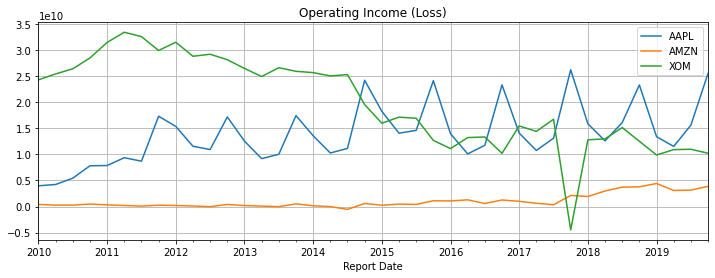

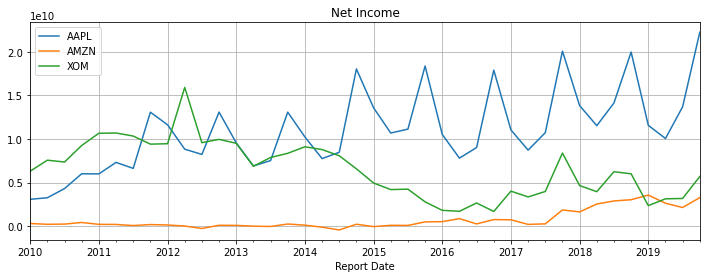

In [8]:
metrics = ['Revenue', 'Cost of Revenue', 'Gross Profit', 'Operating Expenses', 'Operating Income (Loss)', 'Net Income']

for m in metrics:    
    fig, axes = plt.subplots(sharex=True)
    for t in tickers:
        df_income[df_income['Ticker'] == t].tail(num_quarters).plot(
            x='Report Date', y=m, grid=True, figsize=fig_size_1, ax=axes, title=m)
    axes.legend(tickers)

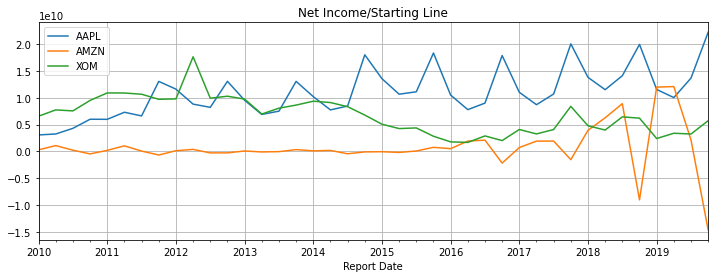

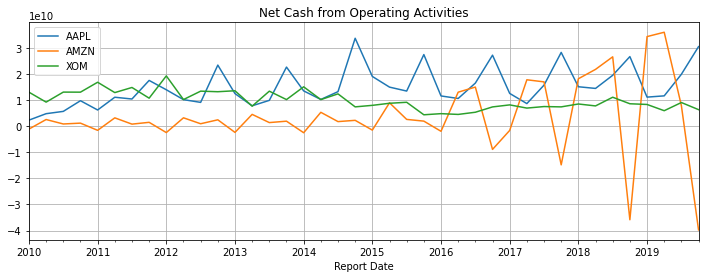

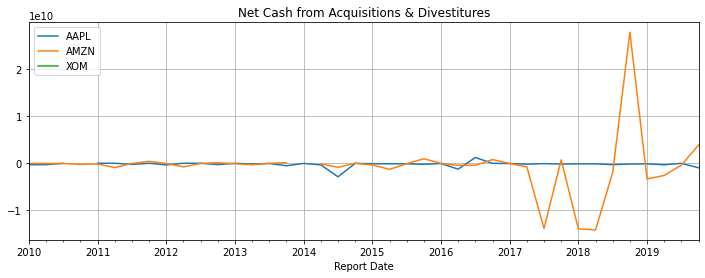

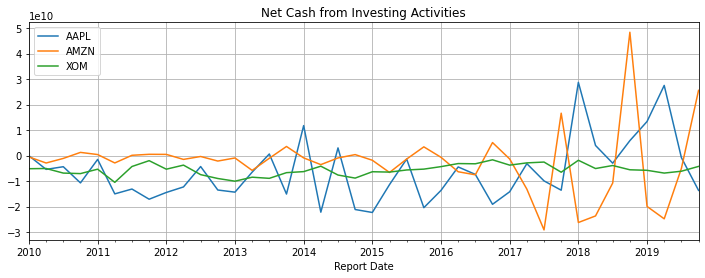

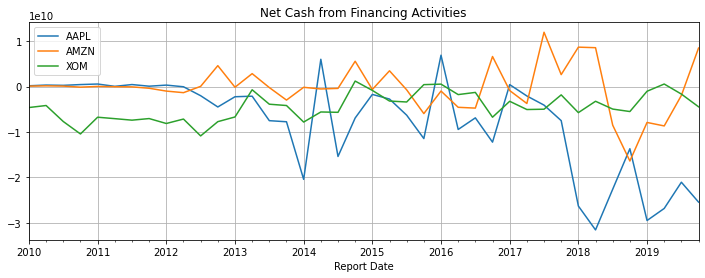

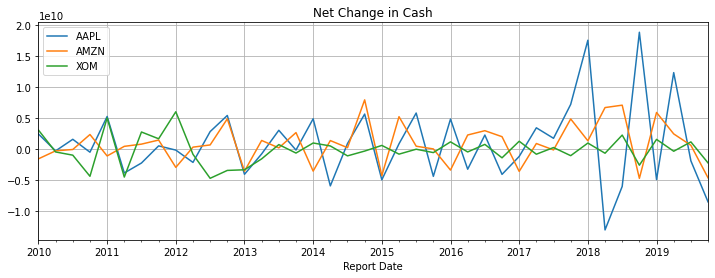

In [9]:
metrics = ['Net Income/Starting Line', 'Net Cash from Operating Activities', 'Net Cash from Acquisitions & Divestitures',
           'Net Cash from Investing Activities', 'Net Cash from Financing Activities', 'Net Change in Cash']

for m in metrics:    
    fig, axes = plt.subplots(sharex=True)
    for t in tickers:
        df_cash[df_cash['Ticker'] == t].tail(num_quarters).plot(
            x='Report Date', y=m, grid=True, figsize=fig_size_1, ax=axes, title=m)
    axes.legend(tickers)

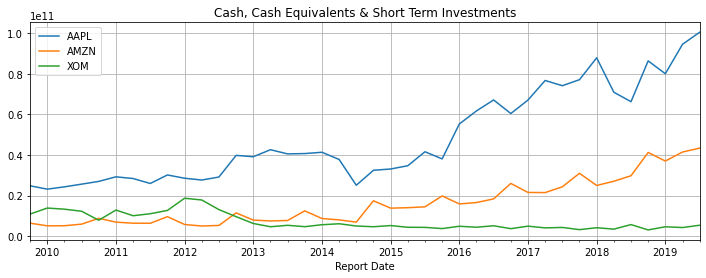

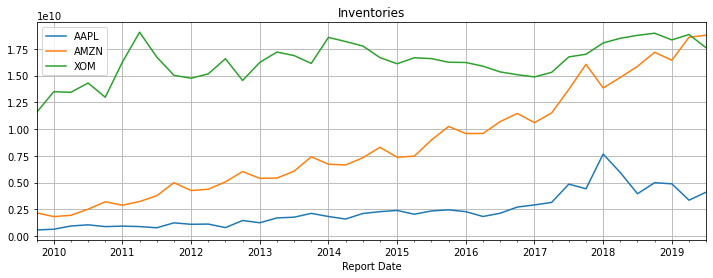

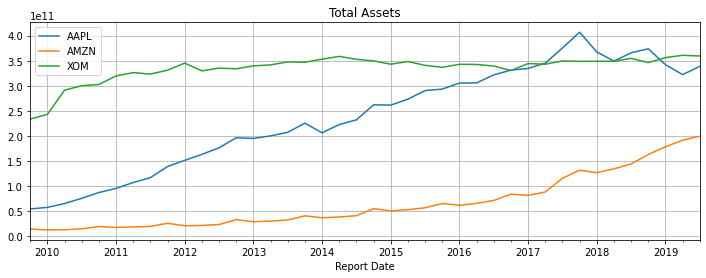

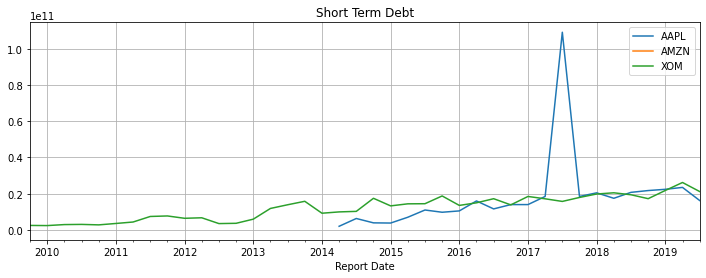

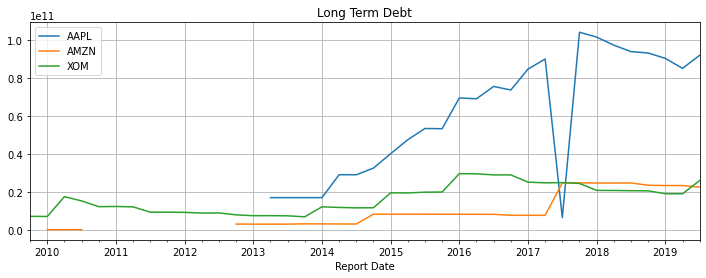

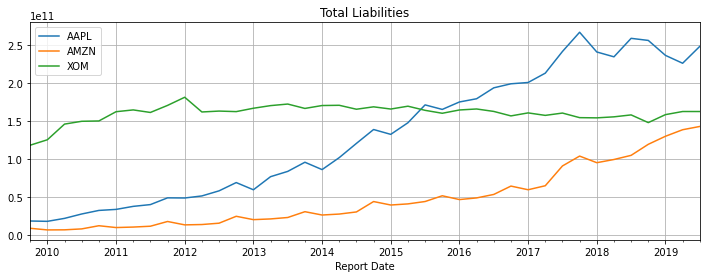

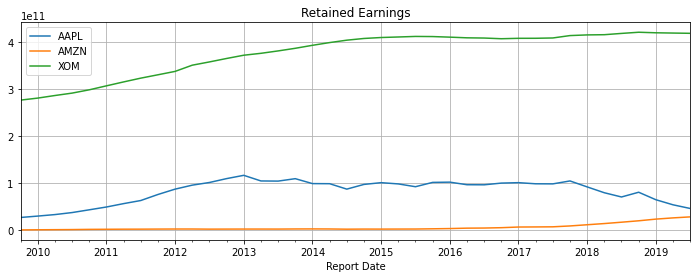

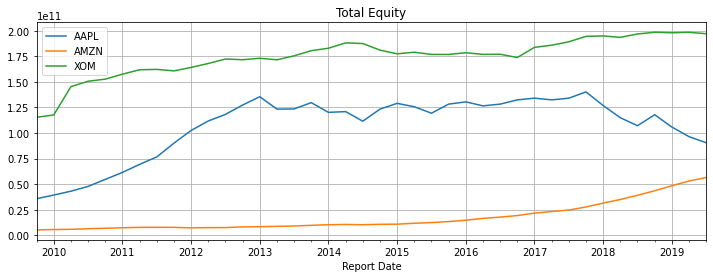

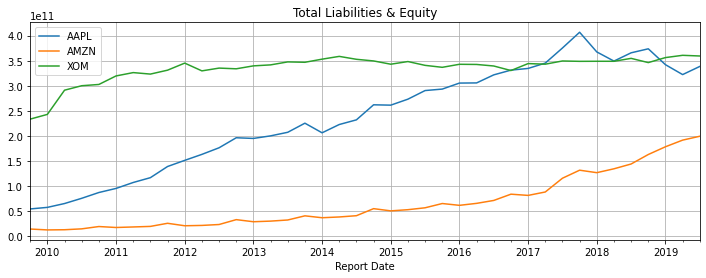

In [10]:
metrics = ['Cash, Cash Equivalents & Short Term Investments', 'Inventories', 'Total Assets',
           'Short Term Debt', 'Long Term Debt', 'Total Liabilities', 'Retained Earnings', 'Total Equity',
           'Total Liabilities & Equity']

for m in metrics:    
    fig, axes = plt.subplots(sharex=True)
    for t in tickers:
        df_balance[df_balance['Ticker'] == t].tail(num_quarters).plot(
            x='Report Date', y=m, grid=True, figsize=fig_size_1, ax=axes, title=m)
    axes.legend(tickers)

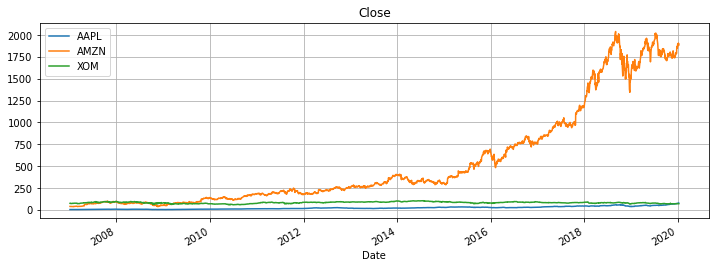

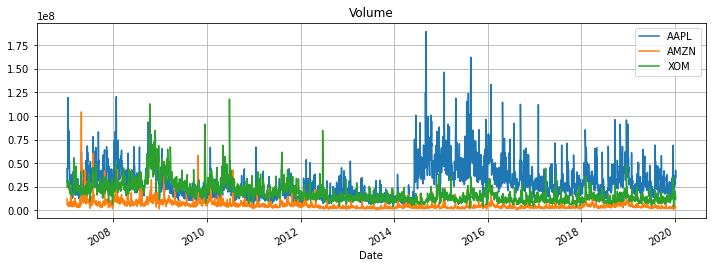

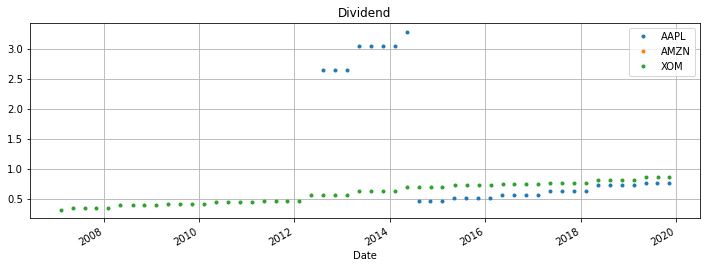

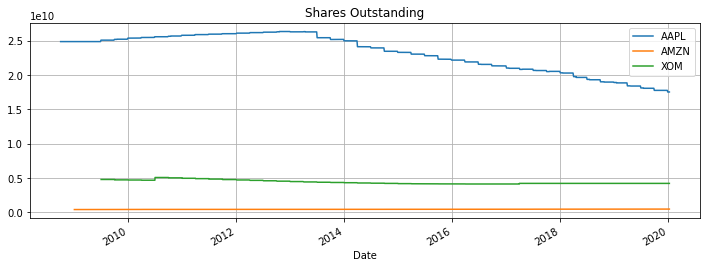

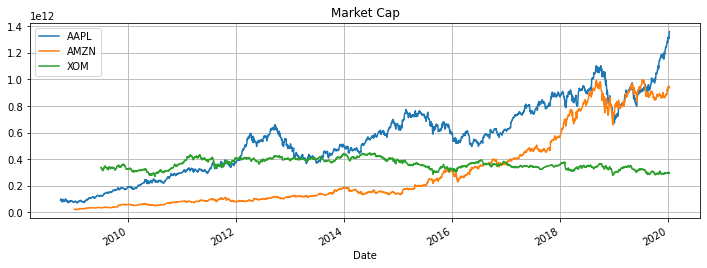

In [11]:
metrics = ['Close', 'Volume', 'Dividend', 'Shares Outstanding', 'Market Cap']

for m in metrics:    
    fig, axes = plt.subplots(sharex=True)
    for t in tickers:
        s = '.' if m == 'Dividend' else '-'
        df_prices[df_prices['Ticker'] == t].tail(num_days).plot(
            x='Date', y=m, grid=True, figsize=fig_size_1, style=s, ax=axes, title=m)
    axes.legend(tickers)